# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy import stats
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        


# Print the city count to confirm sufficient count
print(len(cities))

607


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_num = []
cities_name = []
lat= []
lng= []
temp= []
humidity= []
cloudy= []
wind_speed= []
country= []
date= []
record = 0
set = 1
city_count = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="   


In [4]:
print("Beginning Data Retrieval")
print("-"*64)
for city in cities:      
    weather_response = requests.get(query_url+city)
    weather_json = weather_response.json()
    #print(query_url+city)
    
    try:
         
        city_id = weather_json["id"]    
        cities_num.append(city_id)

        city_name = weather_json["name"]
        cities_name.append(city_name)

        lat.append(weather_json["coord"]["lat"])

        lng.append(weather_json["coord"]["lon"])        

        temp.append(weather_json["main"]["temp"])

        humidity.append(weather_json["main"]["humidity"])

        cloudy.append(weather_json["clouds"]["all"])

        wind_speed.append(weather_json["wind"]["speed"])

        country.append(weather_json["sys"]["country"])

        date.append(weather_json["dt"])

        if record >49:
            record =0
            set +=1
            city_count +=1
            print("-"*64)

        elif set>1:
            city_count +=1
            print(f"Processing Record {record} of Set {set} | {city_name} ")
            record +=1

        else:
            record +=1
            city_count +=1
            print(f"Processing Record {record} of Set {set} | {city_name} ")




    except:
        
        #print(weather_json["message"])
        print(f"City not found. Skipping...")
        pass
    
print("-"*64)
print("Data Retrieval Complete")
print("-"*64)



Beginning Data Retrieval
----------------------------------------------------------------
Processing Record 1 of Set 1 | Tuktoyaktuk 
Processing Record 2 of Set 1 | Bluff 
Processing Record 3 of Set 1 | Rikitea 
Processing Record 4 of Set 1 | Poum 
Processing Record 5 of Set 1 | Strezhevoy 
Processing Record 6 of Set 1 | Tucumã 
Processing Record 7 of Set 1 | Ushuaia 
Processing Record 8 of Set 1 | Albany 
City not found. Skipping...
Processing Record 9 of Set 1 | Atuona 
Processing Record 10 of Set 1 | Khatanga 
Processing Record 11 of Set 1 | Klaksvík 
Processing Record 12 of Set 1 | Yellowknife 
Processing Record 13 of Set 1 | Dunedin 
Processing Record 14 of Set 1 | North Myrtle Beach 
Processing Record 15 of Set 1 | Erenhot 
Processing Record 16 of Set 1 | Kaeo 
Processing Record 17 of Set 1 | Mataura 
Processing Record 18 of Set 1 | Tel Aviv-Yafo 
Processing Record 19 of Set 1 | Saint-Philippe 
Processing Record 20 of Set 1 | Bengkulu 
Processing Record 21 of Set 1 | Lata 
Proces

Processing Record 29 of Set 4 | Ordu 
Processing Record 30 of Set 4 | Aasiaat 
Processing Record 31 of Set 4 | Nizhnevartovsk 
City not found. Skipping...
City not found. Skipping...
Processing Record 32 of Set 4 | Bathsheba 
Processing Record 33 of Set 4 | Ucluelet 
Processing Record 34 of Set 4 | Olinda 
Processing Record 35 of Set 4 | Geraldton 
Processing Record 36 of Set 4 | Inírida 
Processing Record 37 of Set 4 | Camabatela 
Processing Record 38 of Set 4 | Antofagasta 
Processing Record 39 of Set 4 | Bud 
Processing Record 40 of Set 4 | Ayan 
Processing Record 41 of Set 4 | Srednekolymsk 
Processing Record 42 of Set 4 | Ilulissat 
Processing Record 43 of Set 4 | Kutum 
Processing Record 44 of Set 4 | Ust-Nera 
Processing Record 45 of Set 4 | Batagay-Alyta 
Processing Record 46 of Set 4 | Upernavik 
Processing Record 47 of Set 4 | Perelyub 
Processing Record 48 of Set 4 | San Patricio 
Processing Record 49 of Set 4 | Boende 
-------------------------------------------------------

Processing Record 9 of Set 8 | Mikkeli 
Processing Record 10 of Set 8 | Flinders 
Processing Record 11 of Set 8 | Kota Belud 
Processing Record 12 of Set 8 | Kirakira 
Processing Record 13 of Set 8 | Oleksandrivka 
Processing Record 14 of Set 8 | Port Blair 
Processing Record 15 of Set 8 | Brainerd 
Processing Record 16 of Set 8 | Hīt 
Processing Record 17 of Set 8 | Zhanakorgan 
Processing Record 18 of Set 8 | Asău 
Processing Record 19 of Set 8 | ‘Ewa Beach 
Processing Record 20 of Set 8 | Loikaw 
Processing Record 21 of Set 8 | Havre-St-Pierre 
Processing Record 22 of Set 8 | Christchurch 
Processing Record 23 of Set 8 | Half Moon Bay 
Processing Record 24 of Set 8 | Alabaster 
Processing Record 25 of Set 8 | Hūn 
Processing Record 26 of Set 8 | Zermatt 
Processing Record 27 of Set 8 | Tottori-shi 
City not found. Skipping...
Processing Record 28 of Set 8 | São José da Coroa Grande 
Processing Record 29 of Set 8 | Turukhansk 
Processing Record 30 of Set 8 | Carauari 
Processing Reco

Processing Record 35 of Set 11 | Monster 
City not found. Skipping...
City not found. Skipping...
Processing Record 36 of Set 11 | Aleksandrovsk 
Processing Record 37 of Set 11 | Moose Factory 
Processing Record 38 of Set 11 | Biloli 
Processing Record 39 of Set 11 | Oddur 
Processing Record 40 of Set 11 | Lichinga 
Processing Record 41 of Set 11 | Codrington 
Processing Record 42 of Set 11 | Airai 
Processing Record 43 of Set 11 | Marzuq 
City not found. Skipping...
Processing Record 44 of Set 11 | Santarém 
Processing Record 45 of Set 11 | Kieta 
Processing Record 46 of Set 11 | Green River 
Processing Record 47 of Set 11 | Manzhouli 
Processing Record 48 of Set 11 | Bac Lieu 
Processing Record 49 of Set 11 | Uyuni 
----------------------------------------------------------------
----------------------------------------------------------------
Data Retrieval Complete
----------------------------------------------------------------


In [6]:
print(len(lng))
print(len(lat))
print(city_count)
print(len(temp))
print(len(humidity))
print(len(cloudy))
print(len(wind_speed))
print(len(country))
print(len(date))    

'\n# print(len(lng))\nprint(len(lat))\nprint(city_count)\nprint(len(temp))\nprint(len(humidity))\nprint(len(cloudy))\nprint(len(wind_speed))\nprint(len(country))\nprint(len(date))\n'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_dict = {
    "City": cities_name,
    "Country":country,
    "Date":date,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness":cloudy,
    "Wind Speed":wind_speed    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file)
weather_data

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,1630003797,69.4541,-133.0374,286.15,88,75,5.66
1,Bluff,NZ,1630003797,-46.6000,168.3333,278.60,72,91,4.08
2,Rikitea,PF,1630003797,-23.1203,-134.9692,295.21,70,0,5.12
3,Poum,NC,1630003798,-20.2333,164.0167,295.63,82,12,5.16
4,Strezhevoy,RU,1630003798,60.7333,77.5889,292.14,89,96,2.40
...,...,...,...,...,...,...,...,...,...
556,Green River,US,1630004000,41.5286,-109.4662,298.86,36,56,2.24
557,Manzhouli,CN,1630004000,49.6000,117.4333,284.25,90,100,4.83
558,Bac Lieu,VN,1630004000,9.2850,105.7244,298.36,86,100,2.92
559,Uyuni,BO,1630004001,-20.4597,-66.8250,284.51,9,0,8.40


In [13]:
weather_data.describe()

,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,5.610000e+02,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,1.630004e+09,19.614446,17.811715,293.577380,69.026738,52.023173,3.493191
std,9.104246e+01,33.439131,91.446122,8.849194,22.695366,41.145228,2.471260
min,1.630003e+09,-54.800000,-179.166700,274.130000,8.000000,0.000000,0.000000
25%,1.630004e+09,-8.619900,-63.166700,286.680000,56.000000,6.000000,1.790000
50%,1.630004e+09,22.890900,26.501900,294.510000,75.000000,50.000000,2.940000
75%,1.630004e+09,47.666600,93.450000,300.200000,87.000000,99.000000,4.680000
max,1.630004e+09,78.218600,179.316700,313.880000,100.000000,100.000000,16.540000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
weather_data.loc[weather_data["Humidity"] >100,:]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

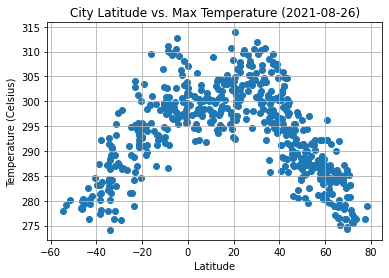

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
today =date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

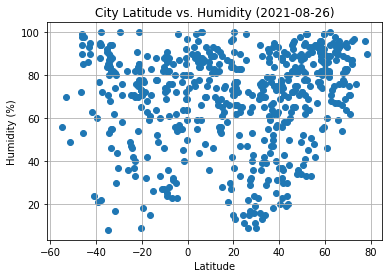

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
today =date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

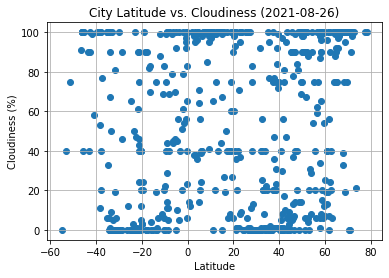

In [19]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
today =date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

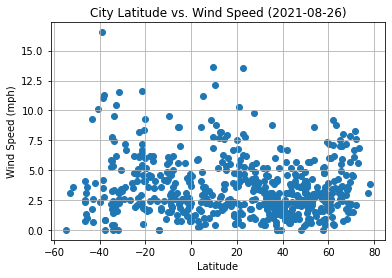

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
today =date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeed.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
hem_n_df = weather_data.loc[weather_data['Lat'] >= 0,:]
x_values_n = hem_n_df["Lat"]
y_temp_n = hem_n_df['Max Temp']
 
# Perform a linear regression on Max Temperature vs. latitude
(slope_temp_n, intercept_temp_n, rvalue_temp_n, pvalue, stderr) = stats.linregress(x_values_n, y_temp_n)

# Get regression values
regress_values_tempn = x_values_n * slope_temp_n + intercept_temp_n
#print(regress_values_tempn)
line_eq_n = "y = " + str(round(slope_temp_n,2)) + "x +" + str(round(intercept_temp_n,2))

The r value is: -0.747311380689466


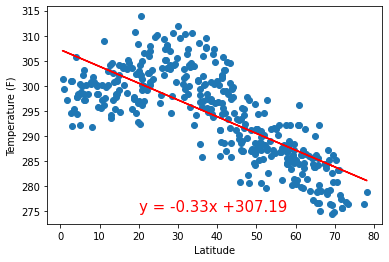

In [22]:
plt.scatter(x_values_n,y_temp_n)
plt.plot(x_values_n,regress_values_tempn,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq_n,(20,275),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_temp_n}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:
hem_s_df = weather_data.loc[weather_data['Lat'] < 0,:]
x_values_s = hem_s_df["Lat"]
y_temp_s = hem_s_df['Max Temp']
# Perform a linear regression on Max Temperature vs. latitude
(slope_temp_s, intercept_temp_s, rvalue_temp_s, pvalue, stderr) = stats.linregress(x_values_s, y_temp_s)

# Get regression values
regress_values_temps = x_values_s * slope_temp_s + intercept_temp_s
#print(regress_values_temps)
line_eq_s = "y = " + str(round(slope_temp_s,2)) + "x +" + str(round(intercept_temp_s,2))

The r value is: 0.8099175914281017


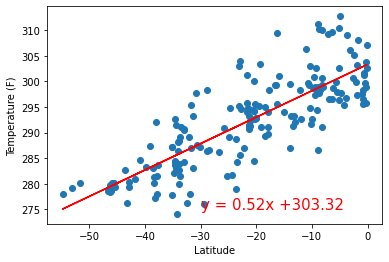

In [24]:
plt.scatter(x_values_s,y_temp_s)
plt.plot(x_values_s,regress_values_temps,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq_s,(-30,275),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_temp_s}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [25]:
#hem_n_df = weather_data.loc[weather_data['Lat'] >= 0,:]
#x_values_n = hem_n_df["Lat"]
y_humid_n = hem_n_df['Humidity']
 
# Perform a linear regression on Max Temperature vs. latitude
(slope_humid_n, intercept_humid_n, rvalue_humid_n, pvalue, stderr) = stats.linregress(x_values_n, y_humid_n)

# Get regression values
regress_values_humidn = x_values_n * slope_humid_n + intercept_humid_n
#print(regress_values_humidn)
line_eq_n = "y = " + str(round(slope_humid_n,2)) + "x +" + str(round(intercept_humid_n,2))

The r value is: 0.19800863218918432


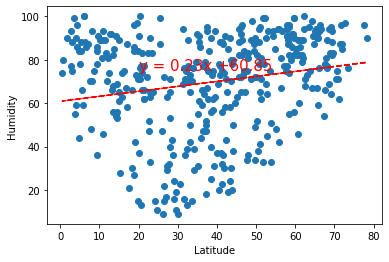

In [26]:
plt.scatter(x_values_n,y_humid_n)
plt.plot(x_values_n,regress_values_humidn,"r--")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_n,(20,75),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_humid_n}")
# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [27]:
#hem_s_df = weather_data.loc[weather_data['Lat'] < 0,:]
#x_values_s = hem_s_df["Lat"]
y_humid_s = hem_s_df['Humidity']
# Perform a linear regression on Max Temperature vs. latitude
(slope_humid_s, intercept_humid_s, rvalue_humid_s, pvalue, stderr) = stats.linregress(x_values_s, y_humid_s)

# Get regression values
regress_values_humids = x_values_s * slope_humid_s + intercept_humid_s
#print(regress_values_humids)
line_eq_s = "y = " + str(round(slope_humid_s,2)) + "x +" + str(round(intercept_humid_s,2))

The r value is: -0.16493112229313886


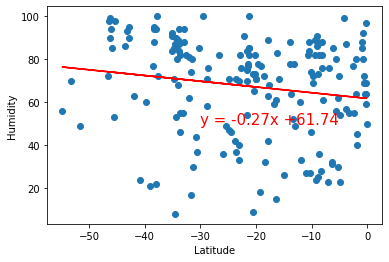

In [28]:
plt.scatter(x_values_s,y_humid_s)
plt.plot(x_values_s,regress_values_humids,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_s,(-30,50),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_humid_s}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [29]:
#hem_n_df = weather_data.loc[weather_data['Lat'] >= 0,:]
#x_values_n = hem_n_df["Lat"]
y_cloud_n = hem_n_df['Cloudiness']
 
# Perform a linear regression on Max Temperature vs. latitude
(slope_cloud_n, intercept_cloud_n, rvalue_cloud_n, pvalue, stderr) = stats.linregress(x_values_n, y_cloud_n)

# Get regression values
regress_values_cloudn = x_values_n * slope_cloud_n + intercept_cloud_n
#print(regress_values_cloudn)
line_eq_n = "y = " + str(round(slope_cloud_n,2)) + "x +" + str(round(intercept_cloud_n,2))

The r value is: 0.05895655796920388


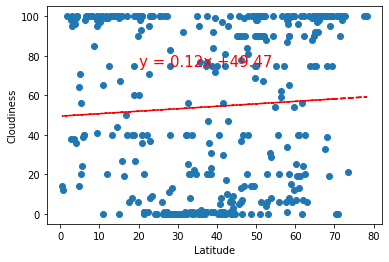

In [30]:
plt.scatter(x_values_n,y_cloud_n)
plt.plot(x_values_n,regress_values_cloudn,"r--")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_n,(20,75),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_cloud_n}")
# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [31]:
#hem_s_df = weather_data.loc[weather_data['Lat'] < 0,:]
#x_values_s = hem_s_df["Lat"]
y_cloud_s = hem_s_df['Cloudiness']
# Perform a linear regression on Max Temperature vs. latitude
(slope_cloud_s, intercept_cloud_s, rvalue_cloud_s, pvalue, stderr) = stats.linregress(x_values_s, y_cloud_s)

# Get regression values
regress_values_clouds = x_values_s * slope_cloud_s + intercept_cloud_s
#print(regress_values_clouds)
line_eq_s = "y = " + str(round(slope_cloud_s,2)) + "x +" + str(round(intercept_cloud_s,2))


The r value is: -0.02970938791124459


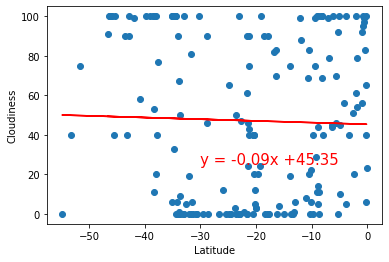

In [32]:
plt.scatter(x_values_s,y_cloud_s)
plt.plot(x_values_s,regress_values_clouds,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_s,(-30,25),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_cloud_s}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [33]:
#hem_n_df = weather_data.loc[weather_data['Lat'] >= 0,:]
#x_values_n = hem_n_df["Lat"]
y_wind_n = hem_n_df['Wind Speed']
 
# Perform a linear regression on Max Temperature vs. latitude
(slope_wind_n, intercept_wind_n, rvalue_wind_n, pvalue, stderr) = stats.linregress(x_values_n, y_wind_n)

# Get regression values
regress_values_windn = x_values_n * slope_wind_n + intercept_wind_n
#print(regress_values_windn)
line_eq_n = "y = " + str(round(slope_wind_n,2)) + "x +" + str(round(intercept_wind_n,2))


The r value is: -0.052596840409714324


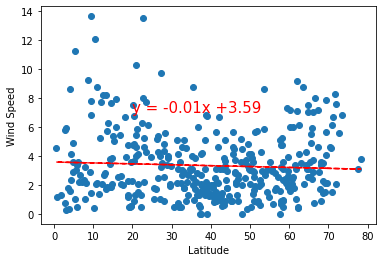

In [34]:
plt.scatter(x_values_n,y_wind_n)
plt.plot(x_values_n,regress_values_windn,"r--")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_n,(20,7),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_wind_n}")
# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [35]:
#hem_s_df = weather_data.loc[weather_data['Lat'] < 0,:]
#x_values_s = hem_s_df["Lat"]
y_wind_s = hem_s_df['Wind Speed']
# Perform a linear regression on Max Temperature vs. latitude
(slope_wind_s, intercept_wind_s, rvalue_wind_s, pvalue, stderr) = stats.linregress(x_values_s, y_wind_s)

# Get regression values
regress_values_winds = x_values_s * slope_wind_s + intercept_wind_s
#print(regress_values_winds)
line_eq_s = "y = " + str(round(slope_wind_s,2)) + "x +" + str(round(intercept_wind_s,2))

The r value is: -0.10301142025685363


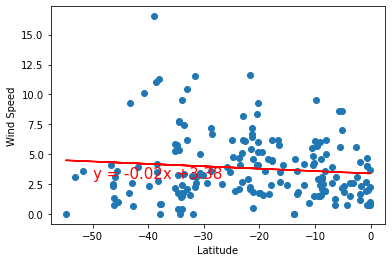

In [36]:
plt.scatter(x_values_s,y_wind_s)
plt.plot(x_values_s,regress_values_winds,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_s,(-50,3),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_wind_s}")

# Show plot
plt.show()